<a href="https://colab.research.google.com/github/nhuynguyenthi/DoAnCN1_CNN/blob/master/Thi_Giac_may_tinh_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Create a list with the filepaths for training and testing
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
train_dir = Path('/content/drive/MyDrive/fruit_vegetables/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/drive/MyDrive/fruit_vegetables/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/drive/MyDrive/fruit_vegetables/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 3972

Number of different labels: 36

Labels: ['pineapple' 'paprika' 'kiwi' 'chilli pepper' 'cauliflower' 'watermelon'
 'onion' 'sweetcorn' 'beetroot' 'corn' 'lemon' 'pomegranate' 'capsicum'
 'carrot' 'eggplant' 'tomato' 'peas' 'pear' 'lettuce' 'cucumber' 'garlic'
 'grapes' 'bell pepper' 'spinach' 'sweetpotato' 'cabbage' 'jalepeno'
 'apple' 'potato' 'orange' 'soy beans' 'turnip' 'banana' 'raddish'
 'ginger' 'mango']


In [ ]:
# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/fruit_vegetables/train/...,mango
1,/content/drive/MyDrive/fruit_vegetables/train/...,chilli pepper
2,/content/drive/MyDrive/fruit_vegetables/train/...,kiwi
3,/content/drive/MyDrive/fruit_vegetables/train/...,eggplant
4,/content/drive/MyDrive/fruit_vegetables/train/...,paprika


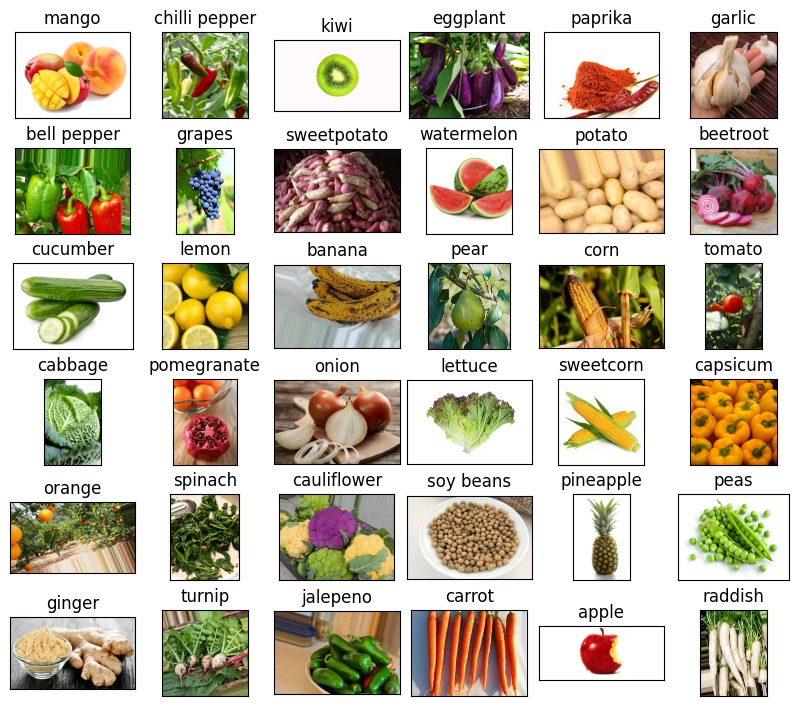

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

# **Data Preprocessing**

**Training Image preprocessing**

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetables/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4307 files belonging to 36 classes.


**Validation Image Preprocessing**

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetables/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 351 files belonging to 36 classes.



# **Building Model**

**Building Convolution Layer**

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# **Compiling and Training Phase**

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

# **Tăng cường ảnh**

In [ ]:
# import thư viện cần thiết
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np


# Nạp ảnh đầu vào và convert vào mảng NumPy rồi thay đổi kích thước, xác định chiều
print("[INFO] Nạp ảnh...")
image = load_img("/content/drive/MyDrive/DataAugmentation/Input/Copy of Image_67.jpg")   # Khai báo đường dẫn chứa ảnh đầu vào
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
# Khởi tạo b sinh ảnh
aug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
total = 0

print("[INFO] Sinh ảnh...")
imageGen = aug.flow(image, batch_size=1, save_to_dir="/content/drive/MyDrive/DataAugmentation/Output", save_prefix="image", save_format="jpg")

for image in imageGen:
	# tăng biến đếm
	total += 1
	if total == 50:  # Tạo 50 ảnh
		break



# **Huấn Luyện Mô hình CNN**

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
135/135 [==============================] - 776s 5s/step - loss: 6.4185 - accuracy: 0.0288 - val_loss: 3.5741 - val_accuracy: 0.0399
Epoch 2/32
135/135 [==============================] - 208s 1s/step - loss: 3.5791 - accuracy: 0.0332 - val_loss: 3.5877 - val_accuracy: 0.0313
Epoch 3/32
135/135 [==============================] - 188s 1s/step - loss: 3.5691 - accuracy: 0.0313 - val_loss: 3.5808 - val_accuracy: 0.0370
Epoch 4/32
135/135 [==============================] - 196s 1s/step - loss: 3.5582 - accuracy: 0.0351 - val_loss: 3.5410 - val_accuracy: 0.0456
Epoch 5/32
135/135 [==============================] - 186s 1s/step - loss: 3.5482 - accuracy: 0.0434 - val_loss: 3.4983 - val_accuracy: 0.0627
Epoch 6/32
135/135 [==============================] - 194s 1s/step - loss: 3.5265 - accuracy: 0.0543 - val_loss: 3.5011 - val_accuracy: 0.0741
Epoch 7/32
135/135 [==============================] - 190s 1s/step - loss: 3.4704 - accuracy: 0.0724 - val_loss: 3.3425 - val_accuracy: 0.1425

# **Evaluating Model**

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

135/135 [==============================] - 114s 797ms/step - loss: 0.1998 - accuracy: 0.9410
Training accuracy: 0.9410262107849121


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 14s 256ms/step - loss: 0.5438 - accuracy: 0.9031
Validation accuracy: 0.9031339287757874


# **Saving Model**

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# bảng thước đo
from sklearn.metrics import classification_report, confusion_matrix
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetables/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
y_true = []
y_pred = []

# Make predictions on the validation_set
for images, labels in validation_set:
    preds = cnn.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Get class names
class_names = list(validation_set.class_names)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Print classification report
print(f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}")
print("-" * 55)
for key, value in report.items():
    if key in class_names:
        print(f"{key:<15}{value['precision']:<10.2f}{value['recall']:<10.2f}{value['f1-score']:<10.2f}{value['support']:<10}")
print("-" * 55)
print(f"{'Accuracy':<15}{report['accuracy']:<10.2f}{'':<30}{sum([report[class_name]['support'] for class_name in class_names]):<10}")
print(f"{'Macro Avg':<15}{report['macro avg']['precision']:<10.2f}{report['macro avg']['recall']:<10.2f}{report['macro avg']['f1-score']:<10.2f}{report['macro avg']['support']:<10}")
print(f"{'Weighted Avg':<15}{report['weighted avg']['precision']:<10.2f}{report['weighted avg']['recall']:<10.2f}{report['weighted avg']['f1-score']:<10.2f}{report['weighted avg']['support']:<10}")

Found 351 files belonging to 36 classes.
1/1 [==============================] - 0s 229ms/step
Class          Precision Recall    F1-Score  Support   
-------------------------------------------------------
apple          0.89      0.80      0.84      10        
banana         1.00      0.56      0.71      9         
beetroot       0.83      1.00      0.91      10        
bell pepper    0.82      1.00      0.90      9         
cabbage        1.00      1.00      1.00      10        
capsicum       0.89      0.80      0.84      10        
carrot         1.00      0.89      0.94      9         
cauliflower    1.00      1.00      1.00      10        
chilli pepper  0.89      0.89      0.89      9         
corn           0.89      0.80      0.84      10        
cucumber       1.00      0.90      0.95      10        
eggplant       0.83      1.00      0.91      10        
garlic         1.00      0.90      0.95      10        
ginger         1.00      0.50      0.67      10        
grapes    

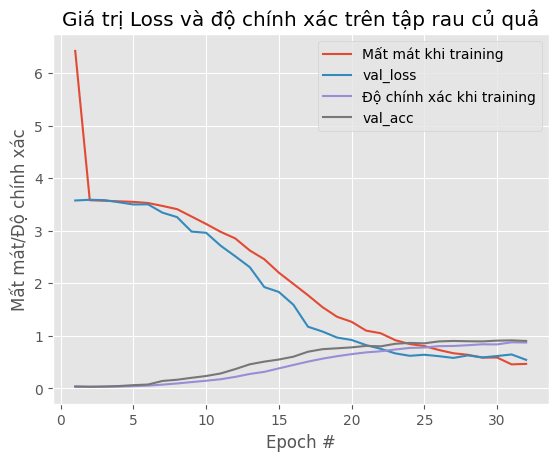

In [ ]:
# Plotting training & validation accuracy and loss values
plt.style.use("ggplot")
plt.figure()
epochs = range(1, len(training_history.history["loss"]) + 1)

plt.plot(epochs, training_history.history["loss"], label="Mất mát khi training")
plt.plot(epochs, training_history.history["val_loss"], label="val_loss")
plt.plot(epochs, training_history.history["accuracy"], label="Độ chính xác khi training")
plt.plot(epochs, training_history.history["val_accuracy"], label="val_acc")

plt.title("Giá trị Loss và độ chính xác trên tập rau củ quả")
plt.xlabel("Epoch #")
plt.ylabel("Mất mát/Độ chính xác")
plt.legend()
plt.show()

In [ ]:
training_history.history #Return Dictionary of history

{'loss': [6.418519496917725,
  3.579072952270508,
  3.5690581798553467,
  3.5582199096679688,
  3.548203229904175,
  3.526477575302124,
  3.4703733921051025,
  3.4097540378570557,
  3.2687220573425293,
  3.1275975704193115,
  2.977738380432129,
  2.8531086444854736,
  2.6241490840911865,
  2.4565865993499756,
  2.201451301574707,
  1.9874595403671265,
  1.7728300094604492,
  1.5454837083816528,
  1.3624677658081055,
  1.2668225765228271,
  1.099380612373352,
  1.049644112586975,
  0.9183650016784668,
  0.8434792757034302,
  0.8062395453453064,
  0.7310929298400879,
  0.6691881418228149,
  0.6396443843841553,
  0.585847795009613,
  0.5881984233856201,
  0.4575091004371643,
  0.4671406149864197],
 'accuracy': [0.028790341690182686,
  0.03320176526904106,
  0.031344324350357056,
  0.03505920618772507,
  0.04341769218444824,
  0.05433015897870064,
  0.07244021445512772,
  0.09449733048677444,
  0.12073368579149246,
  0.14627350866794586,
  0.1750638484954834,
  0.21964244544506073,
  0.275

In [ ]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Calculating Accuracy of Model Achieved on Validation set**

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 90.31339287757874 %


# **Accuracy Visualization**

**Training Visualization**

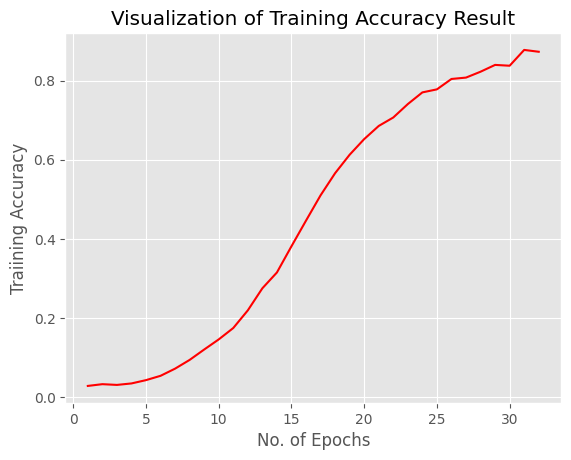

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

**Validation Accuracy**

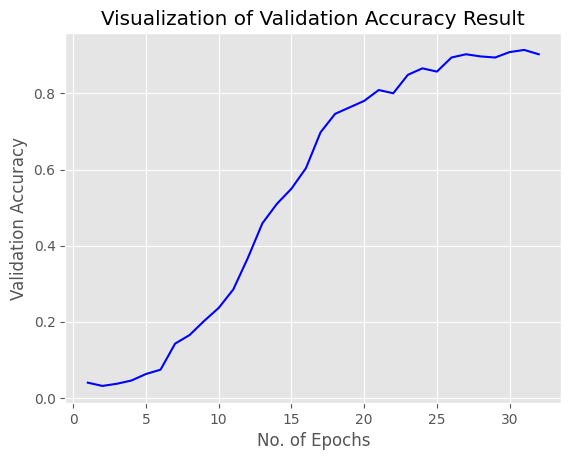

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()


**Test set Evaluation**

In [ ]:

test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetables/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 51s 913ms/step - loss: 0.5343 - accuracy: 0.9053
Test accuracy: 0.9052924513816833


In [ ]:
# Tính toán số lượng tham số đã train
import numpy as np

trainable_params = np.sum([tf.keras.backend.count_params(w) for w in cnn.trainable_weights])
print("Số lượng tham số đã train:", trainable_params)

Số lượng tham số đã train: 6629188
